In [105]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.linalg
# import scipy.signal
import scipy.fft as spfft
# import scipy.ndimage as spimg
# import cvxpy as cvx
from importlib import reload

import util, plot
from util import *

$$
(a+bi)(a-bi) = a^2 - i^2b^2 = a^2 + b^2  \quad
\|\mathbf{x}\|_2^2 = a^2 + b^2
$$

$$
\mathbf{x} := \begin{bmatrix}a\\b\end{bmatrix}  =a + bi
$$

In [106]:
# TODO
# is direction (polsign) applied before/after superposition summation?
#    i.e. should \delta have a sign

# normalizing constant for area
#   factor before exp(): `cosfact=Gz./Gdistances`

# add original source (far away)

# check sampledichtheid

In [107]:
reload(plot)
reload(util)
from util import *

In [108]:
x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase
N_sqrt = compute_N_sqrt()

# Discrete space, near-far field
## Point source

In [104]:
y.shape

(6400, 2)

Warning, phase terms of third order and higher must be negligible
Warning, F is near 1, for F = 10.00
near True


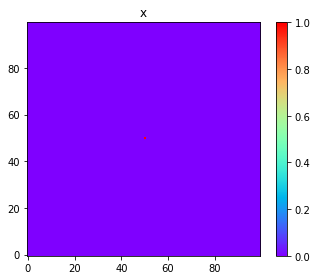

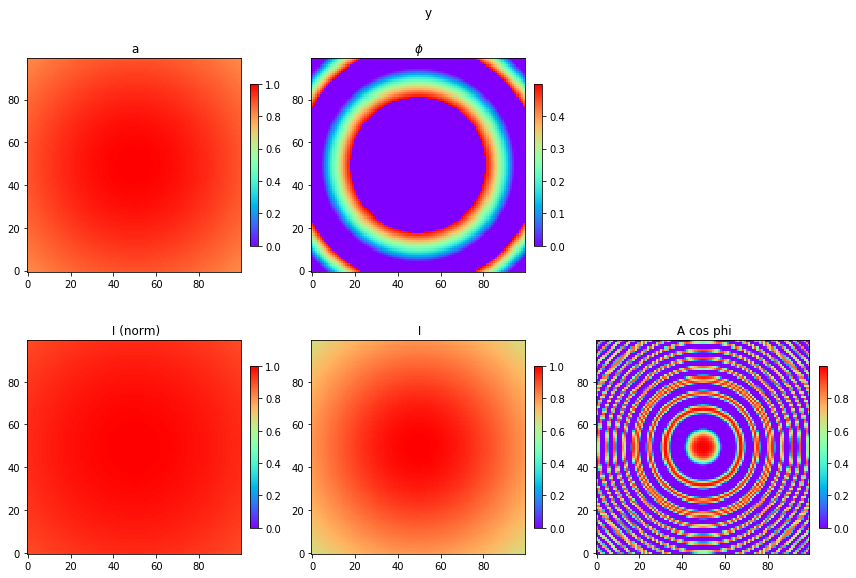

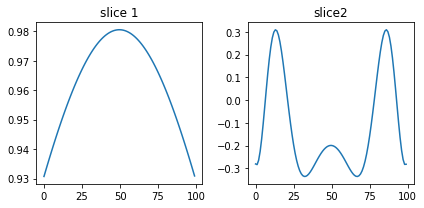

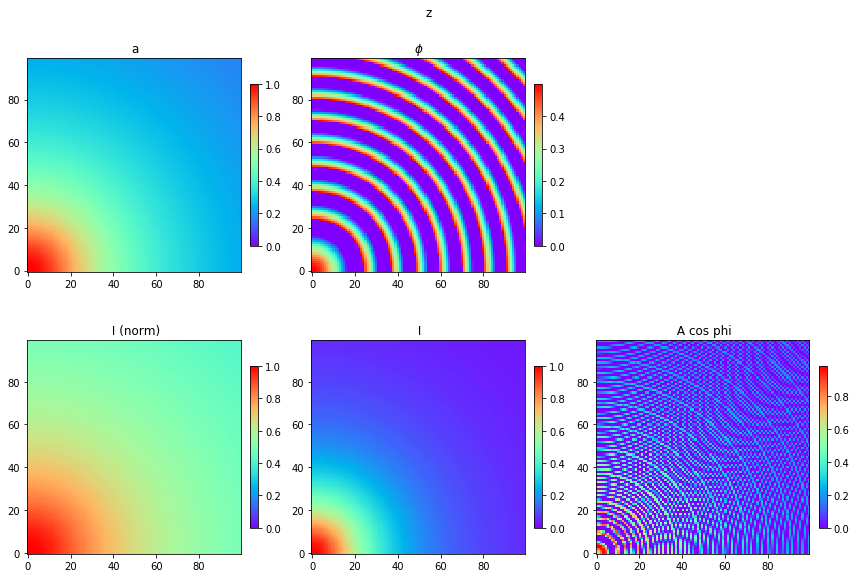

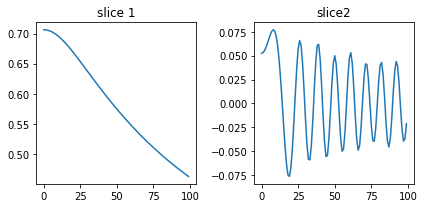

In [39]:
# reload(util)
# reload(plot)
# from util import *
x_width = 1
width = 1e1 * LAMBDA
d = 1e1
w = sample_grid(N, x_width * LAMBDA)
v = sample_grid(N, width, d * LAMBDA)
u = sample_grid(N, width, d * LAMBDA / 4, center=0)
print('near', near(width, d * LAMBDA))
    
# center pixel
# x[N//2 + N_sqrt//2, 0] = 1
x[:] = 0
x[N//2 + N_sqrt//2, 0] = 1

map_sum_kernel(x,y,w,v)
map_sum_kernel(x,z,w,u)
# for m in range(N):
#     y[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=1)
#     z[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, u[m])), distance=1)
    
normalize_amplitude(y)
normalize_amplitude(z)

plot.matrix(vec_to_im(x[:, 0]), 'x')
plot.matrix_multiple(y, 'y')
plot.matrix_multiple(z, 'z')
# plot.matrix_multiple(v2[:,:2], 'y')

# Vlakke golf
Far away point source

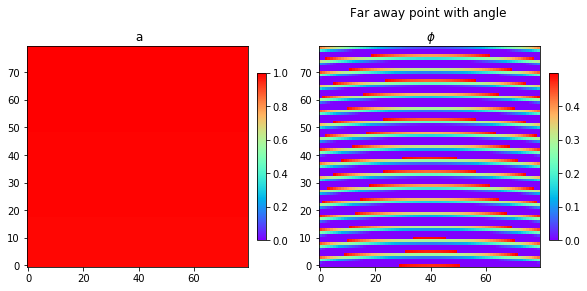

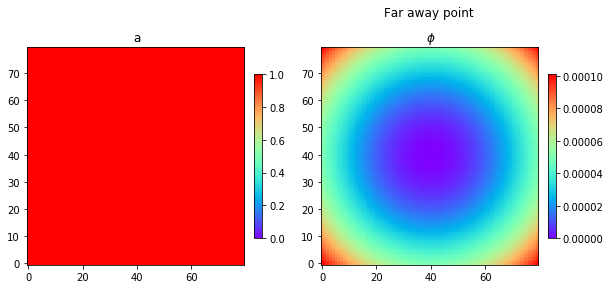

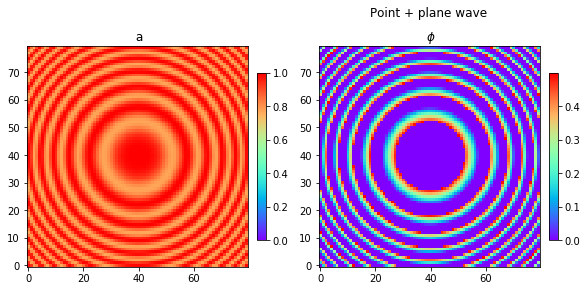

In [24]:
# reload(util)
# reload(plot)
# from util import *
x_width = 1e2
width = 2e2 * LAMBDA
d1 = 0
d2 = 1e1 * width
w = sample_grid(N, x_width, -1e4 * LAMBDA)
v = sample_grid(N, width, d1, center=1)

x[:] = 0
x[N//2 + N_sqrt//2,0] = 1
# offset x dim
w[:,0] += 1e4 * LAMBDA

map_sum_kernel(x,y,w,v, direction=-1)
# for m in range(N):
#     y[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
normalize_amplitude(y)
plot.matrix_multiple(y, 'Far away point with angle', m=1)

w = sample_grid(N, x_width, -1e8 * LAMBDA)
map_sum_kernel(x,y,w,v, distance=-1)
# for m in range(N):
#     y[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
normalize_amplitude(y)
plot.matrix_multiple(y, 'Far away point', m=1)

w2 = np.array([0,0,-1e8])
w = sample_grid(N, x_width, -1e3 * LAMBDA)
# for m in range(N):
#     c = f(N, 0, w2, v[m].reshape((1,-1)))
#     y[m, :] = from_polar(c)
# normalize_amplitude(y)
# plot.matrix_multiple(y, 'Point only', m=1)

# w2 = np.array([0,0,-1e8])
for m in range(N):
    # point
    c = f(2*N, 0, w2, v[m].reshape((1,-1)))
    # plane
#     c += np.sum(f(x[:,0], x[:,1], w, v[m]))
    c += sum_kernel(x,w,v[m])
    y[m, :] = from_polar(c)
normalize_amplitude(y)
plot.matrix_multiple(y, 'Point + plane wave', m=1)

## Single slit
(inf) many point sources

Warning, phase terms of third order and higher must be negligible
near True


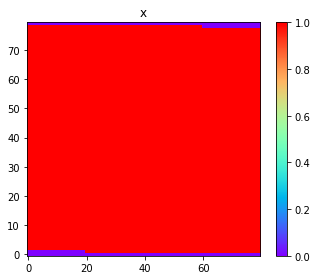

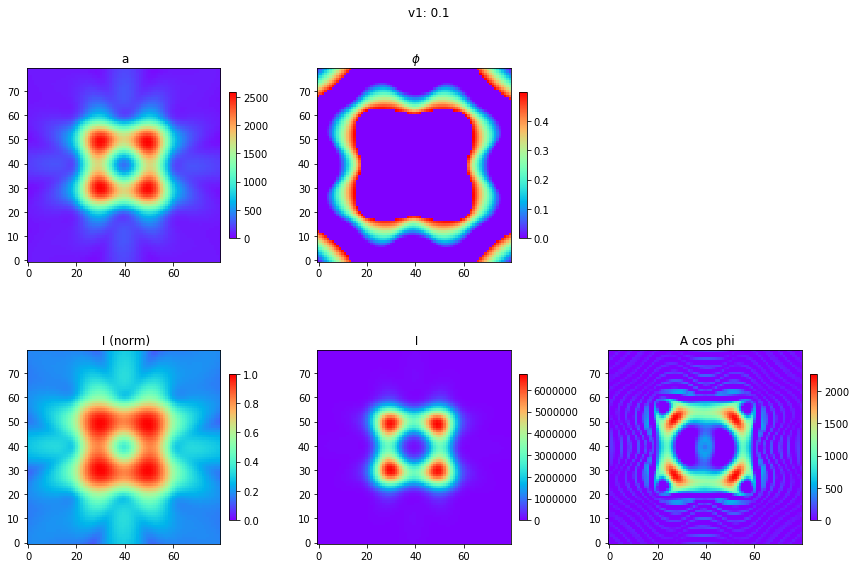

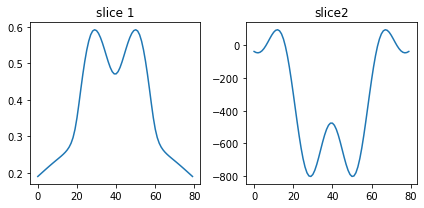

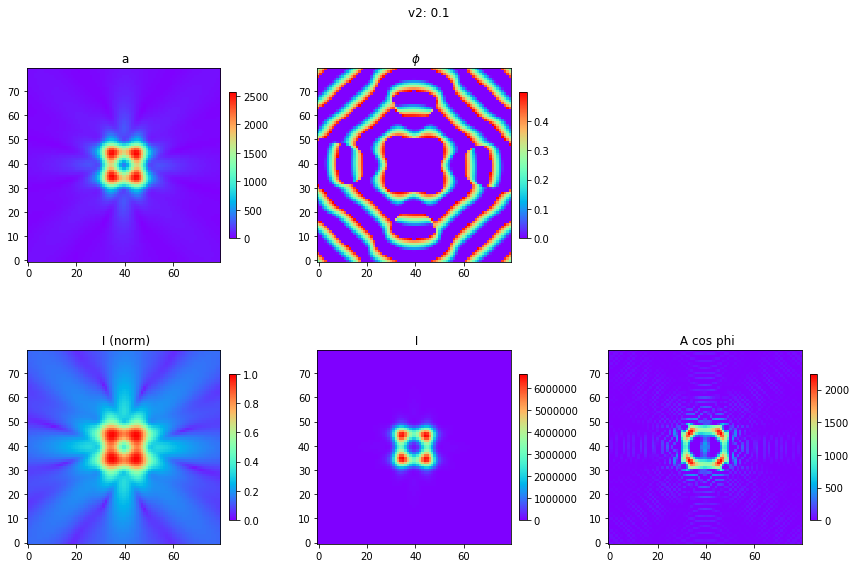

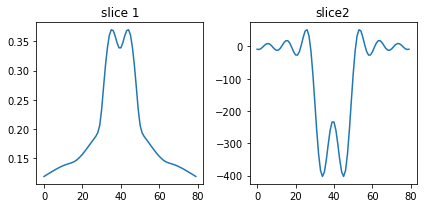

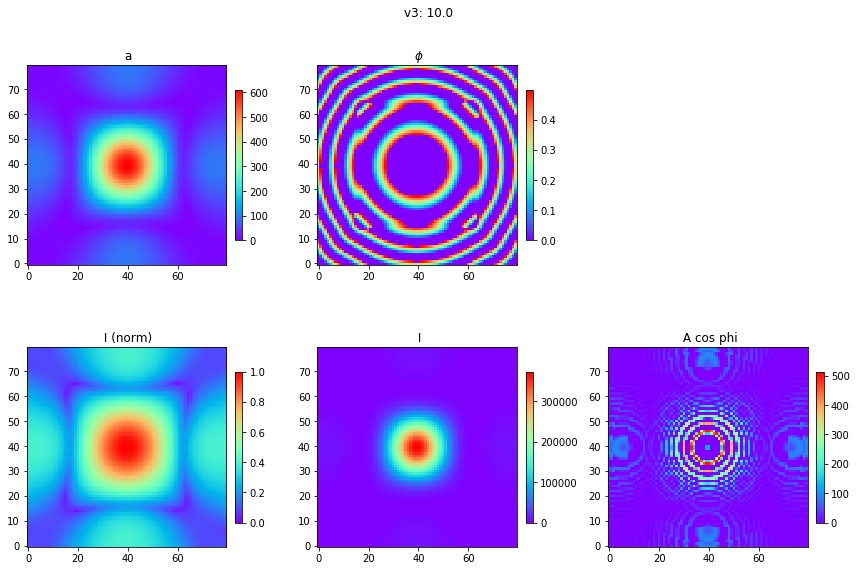

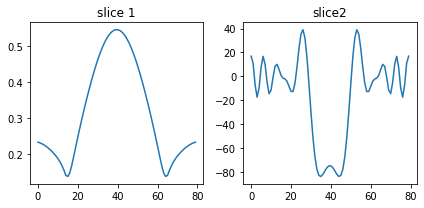

In [28]:
reload(util)
reload(plot)
x_width = 2
width = 4e0 * LAMBDA
d1 = 1e-1
d2 = 1e-1
d3 = 1e1
w = sample_grid(N, x_width * LAMBDA)
v1 = sample_grid(N, width, d1 * LAMBDA)
v2 = sample_grid(N, width*2, d2 * LAMBDA)
v3 = sample_grid(N, width*5, d3 * LAMBDA)
print('near', near(width, d1 * LAMBDA))
# print('near', near(width*2, d2 * LAMBDA))
# print('near', near(width/2, d3 * LAMBDA))

x[:] = 0
x[100:-100, 0] = 1

map_sum_kernel(x,v1[:,:2],w,v1, distance=1)
map_sum_kernel(x,v2[:,:2],w,v2, distance=1)
map_sum_kernel(x,v3[:,:2],w,v3, distance=1)

# for m in range(N):
#     v1[m, :2] = from_polar(np.sum(f(x[:,0], x[:,1], w, v1[m])))
#     v2[m, :2] = from_polar(np.sum(f(x[:,0], x[:,1], w, v2[m])))
#     v3[m, :2] = from_polar(np.sum(f(x[:,0], x[:,1], w, v3[m])))

# normalize_amplitude(y)

plot.matrix(vec_to_im(x[:, 0]), 'x')
plot.matrix_multiple(v1, 'v1: ' + str(d1))
plot.matrix_multiple(v2, 'v2: ' + str(d2))
plot.matrix_multiple(v3, 'v3: ' + str(d3))

## Double slit

Warning, phase terms of third order and higher must be negligible
near True
Warning, phase terms of third order and higher must be negligible
Warning, F is near 1, for F = 10.00
near True


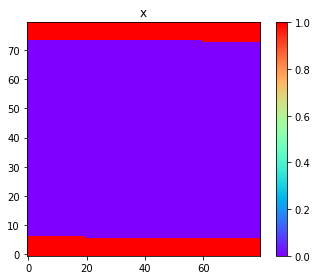

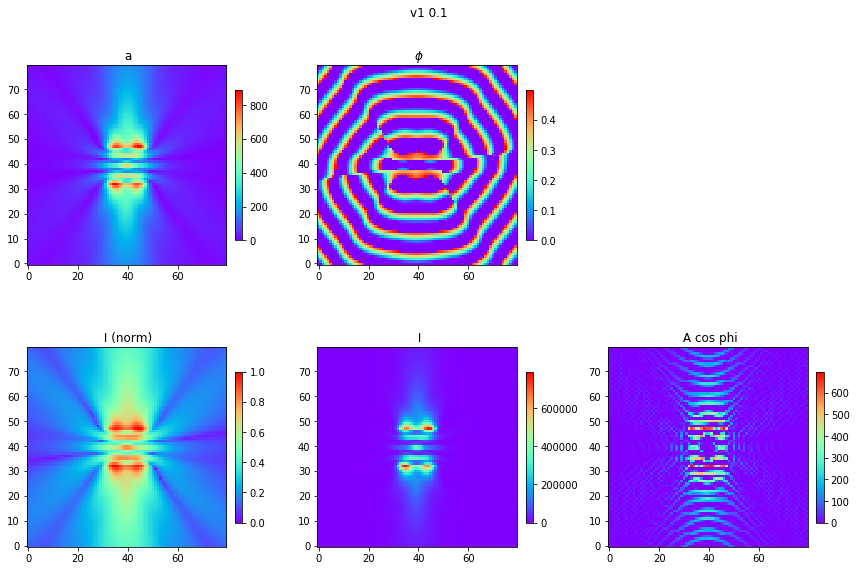

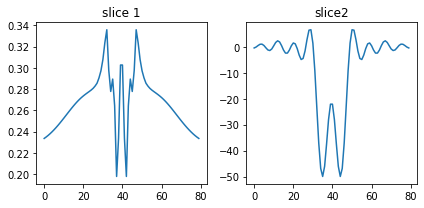

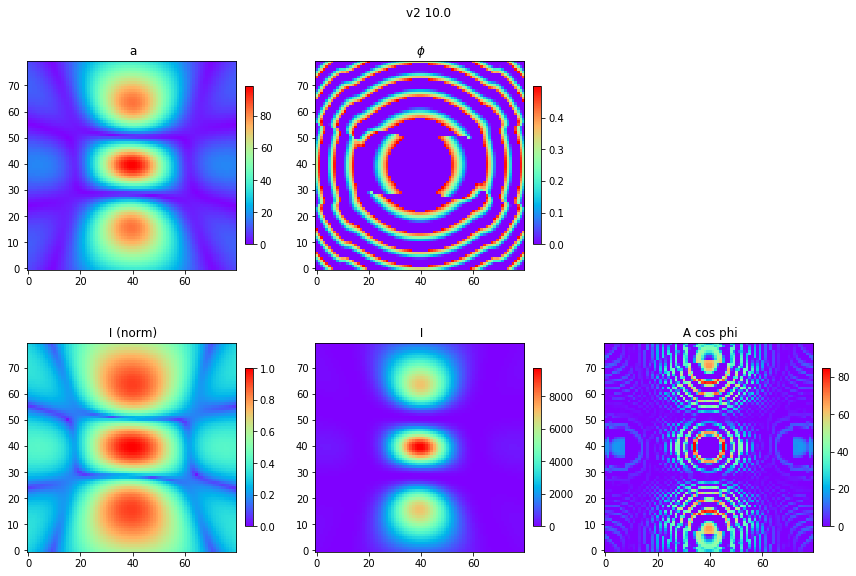

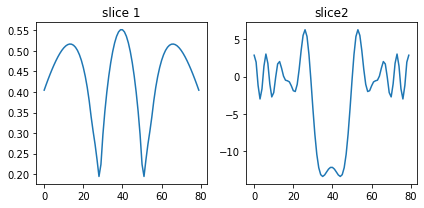

In [29]:
x_width = 2
width = 1e1 * LAMBDA
d1 = 1e-1
d2 = 1e1
w = sample_grid(N, x_width * LAMBDA)
v1 = sample_grid(N, width, d1 * LAMBDA)
v2 = sample_grid(N, 2*width, d2 * LAMBDA)
print('near', near(width, d1 * LAMBDA))
print('near', near(width, d2 * LAMBDA))

x[:] = 0
x[:500, 0] = 1
x[-500:, 0] = 1


map_sum_kernel(x,v1[:,:2],w,v1, distance=1)
map_sum_kernel(x,v2[:,:2],w,v2, distance=1)
# for m in range(N):
#     v1[m, :2] = from_polar(np.sum(f(x[:,0], x[:,1], w, v1[m])), distance=1)
#     v2[m, :2] = from_polar(np.sum(f(x[:,0], x[:,1], w, v2[m])), distance=1)

plot.matrix(vec_to_im(x[:, 0]), 'x')
plot.matrix_multiple(v1, 'v1 ' + str(d1))
plot.matrix_multiple(v2, 'v2 ' + str(d2))

# Projector
Assume point sources for projector "pixels"

1) non random grid, $d = 10 \lambda, 100\lambda$

near False


(1.0, 0.4539434625967054)

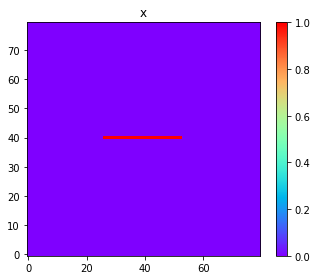

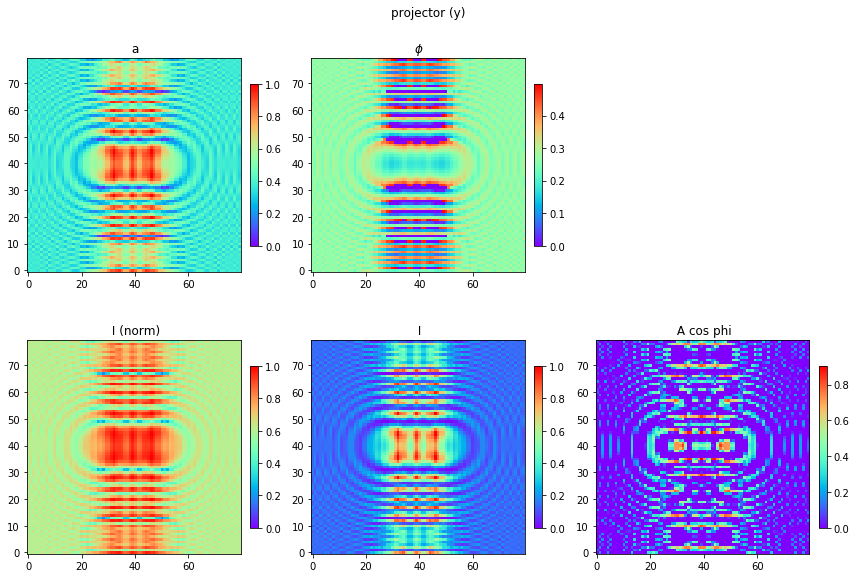

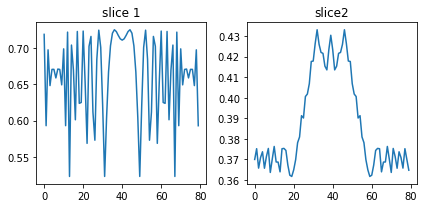

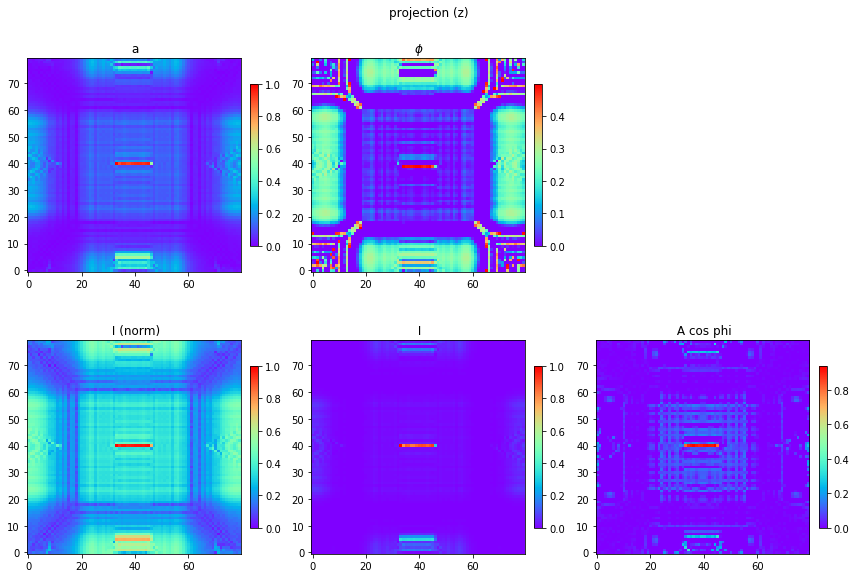

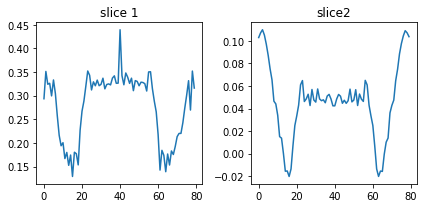

In [31]:
reload(plot)
reload(util)
from util import *

x_width = 1e2
width = 1e2 * LAMBDA
d1 = -1e2
d2 = 0
w = sample_grid(N, x_width * LAMBDA)
v = sample_grid(N, width, d1 * LAMBDA)
u = sample_grid(N, 2*width, d2 * LAMBDA)
print('near', near(width, d1 * LAMBDA))

x[:] = 0
x[N//2 + N_sqrt//3: N//2 + 2*N_sqrt//3, 0] = 1
# x[N//2 + N_sqrt//3, 0] = 1
# x[N//2 + N_sqrt//3, 0] = 1
# x[N//2 + 2*N_sqrt//3, 0] = 1

for m in range(N):
    # source object
    c = sum_kernel(x,w,v[m], direction=-1)
#     c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
    c += f(0.1, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)

normalize_amplitude(y)
map_sum_kernel(y,z,v,u,distance=1)
# for m in range(N):    
#     z[m, :] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

plot.matrix(vec_to_im(x[:, 0]), 'x')
plot.matrix_multiple(y, 'projector (y)')
plot.matrix_multiple(z, 'projection (z)')
a = y[:,0]
a.max(), a.mean()

2) random grid, $d = 10\lambda$

near False


(0.9999999999999999, 0.18175819781894476)

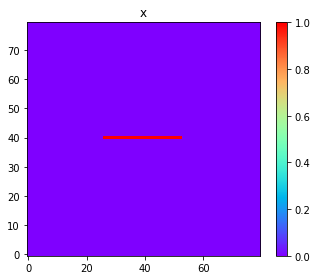

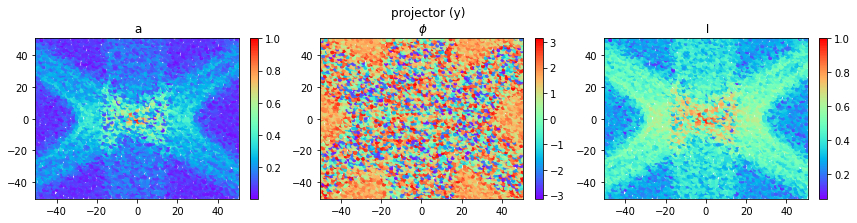

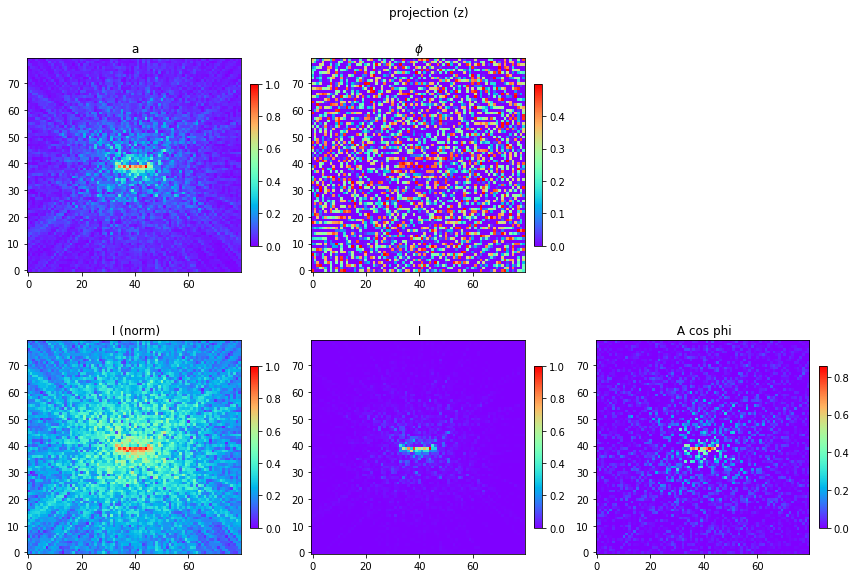

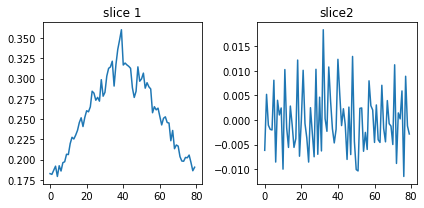

In [32]:
x_width = 1e2
width = 1e2 * LAMBDA
d1 = -1e1
d2 = 0
w = sample_grid(N, x_width * LAMBDA)
v = sample_grid(N, width, d1 * LAMBDA, random=1)
u = sample_grid(N, 2*width, d2 * LAMBDA, random=0)
print('near', near(width, d1 * LAMBDA))

x[:] = 0
x[N//2 + N_sqrt//3: N//2 + 2*N_sqrt//3, 0] = 1
# x[N//2 + N_sqrt//3, 0] = 1
# x[N//2 + N_sqrt//3, 0] = 1
# x[N//2 + 2*N_sqrt//3, 0] = 1

for m in range(N):
    # source object
    c = sum_kernel(x,w,v[m], direction=-1)
#     c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
    c += f(0.1, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)

normalize_amplitude(y)
map_sum_kernel(y,z,v,u,distance=1)
# for m in range(N):    
#     z[m, :] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

plot.matrix(vec_to_im(x[:, 0]), 'x')
# plot.matrix_multiple(y, 'projector (y)')
plot.scatter_multiple(y, v, 'projector (y)')
plot.matrix_multiple(z, 'projection (z)')
# plot.scatter_multiple(z, u, 'projection (z)')
a = y[:,0]
a.max(), a.mean()

2) random grid, $d = 100\lambda$

near False


(1.0, 0.4818372314097881)

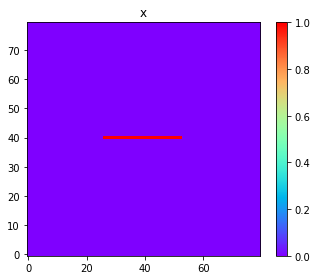

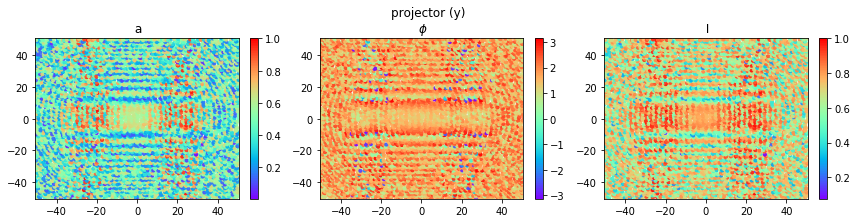

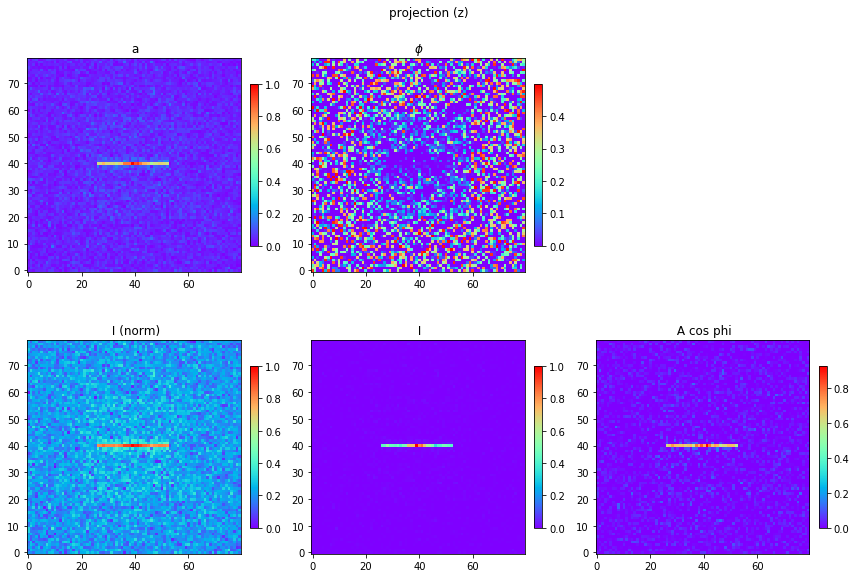

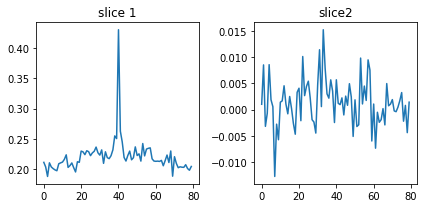

In [43]:
x_width = 2e2
width = 1e2 * LAMBDA
d1 = -1e2
d2 = 0
w = sample_grid(N, x_width * LAMBDA)
v = sample_grid(N, width, d1 * LAMBDA, random=1)
u = sample_grid(N, x_width, d2 * LAMBDA, random=0)
print('near', near(width, d1 * LAMBDA))

x[:] = 0
x[N//2 + N_sqrt//3: N//2 + 2*N_sqrt//3, 0] = 1
# x[N//2 + N_sqrt//3, 0] = 1
# x[N//2 + N_sqrt//3, 0] = 1
# x[N//2 + 2*N_sqrt//3, 0] = 1

for m in range(N):
    # source object
    c = sum_kernel(x,w,v[m], direction=-1)    
#     c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
    c += f(0.1, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)

normalize_amplitude(y)
map_sum_kernel(y,z,v,u,distance=1)
# for m in range(N):    
#     z[m, :] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

plot.matrix(vec_to_im(x[:, 0]), 'x')
# plot.matrix_multiple(y, 'projector (y)')
plot.scatter_multiple(y, v, 'projector (y)')
plot.matrix_multiple(z, 'projection (z)')
# plot.scatter_multiple(z, u, 'projection (z)')
a = y[:,0]
a.max(), a.mean()

### Different object shape

near False


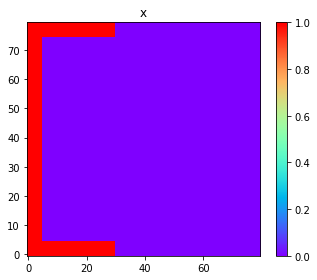

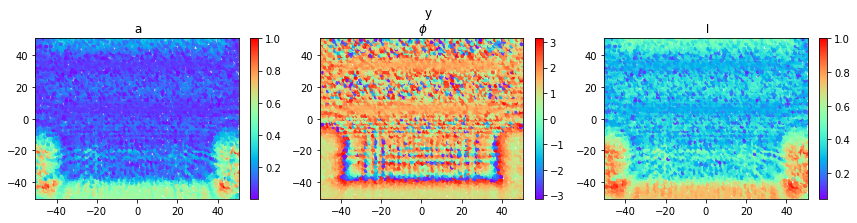

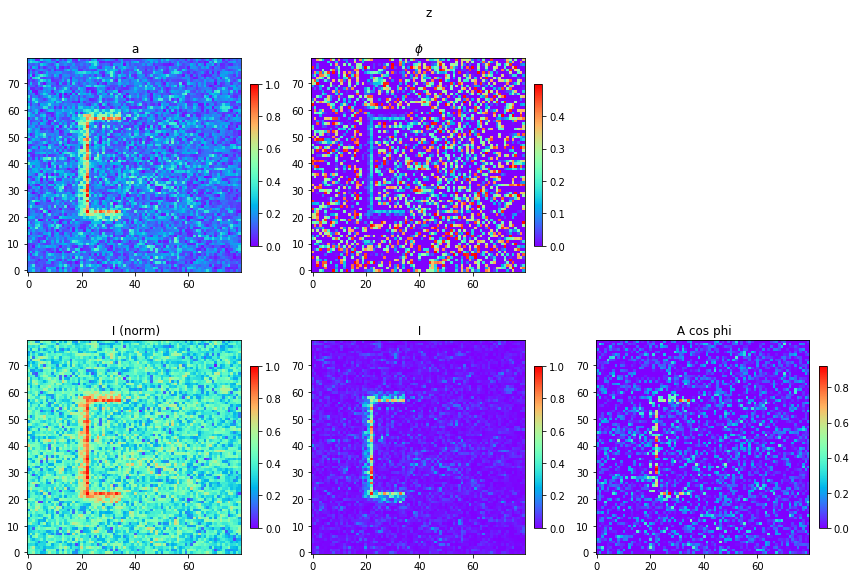

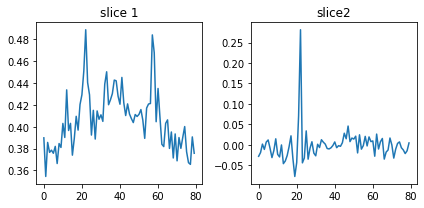

In [11]:
x_width = 1e2
y_width = 1e2 * LAMBDA
d1 = -1e2
d2 = 0
w = sample_grid(N, x_width * LAMBDA)
v = sample_grid(N, y_width, d1 * LAMBDA, random=1)
u = sample_grid(N, 2*x_width, d2 * LAMBDA, random=0)
print('near', near(y_width, d1 * LAMBDA))

x[:] = 0
# x[N//2 + N_sqrt//3: N//2 + 2*N_sqrt//3, 0] = 1
# x[N//4 + N_sqrt//6: N//4 + N_sqrt//3, 0] = 1
# x[3*N//4 + N_sqrt//6: 3*N//4 + N_sqrt//3, 0] = 1
# for i in range(N_sqrt//3):
#     x[N//3 + N_sqrt//2 + i*N_sqrt, 0] = 1
# # x[N//3 + N_sqrt//3: N//3 + 2*N_sqrt//3, 0] = 1
# # x[N//2 + N_sqrt//3, 0] = 1
# # x[N//2 + 2*N_sqrt//3, 0] = 1
a = x[:,0].reshape((N_sqrt, N_sqrt))
a[:] = 1
a[5:-5, 5:-5] = 0
a[:,30:] = 0
# a[20:30, 20:30] = 0
# a[22:28, 22:28] = 0
# a[1:10] = 1
# a[-10:-1,] = 1
x[:,0] = a.flatten()


for m in range(N):
#     y[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=1)
    # source object
    c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
    c += f(0.1, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)  
    
normalize_amplitude(y)
for m in range(N):    
    z[m, :] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

plot.matrix(vec_to_im(x[:, 0]), 'x')
# plot.matrix_multiple(y, 'y')
plot.scatter_multiple(y, v, 'y')
# plot.scatter_multiple(z, u, 'z')
plot.matrix_multiple(z, 'z')

### overcompensate

near False


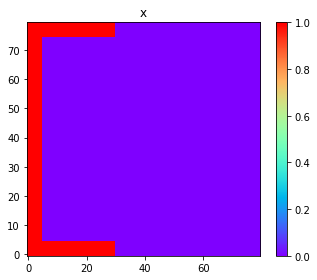

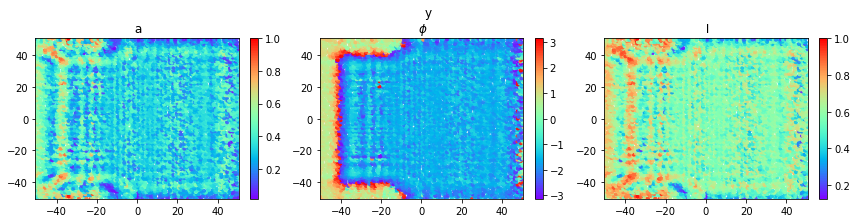

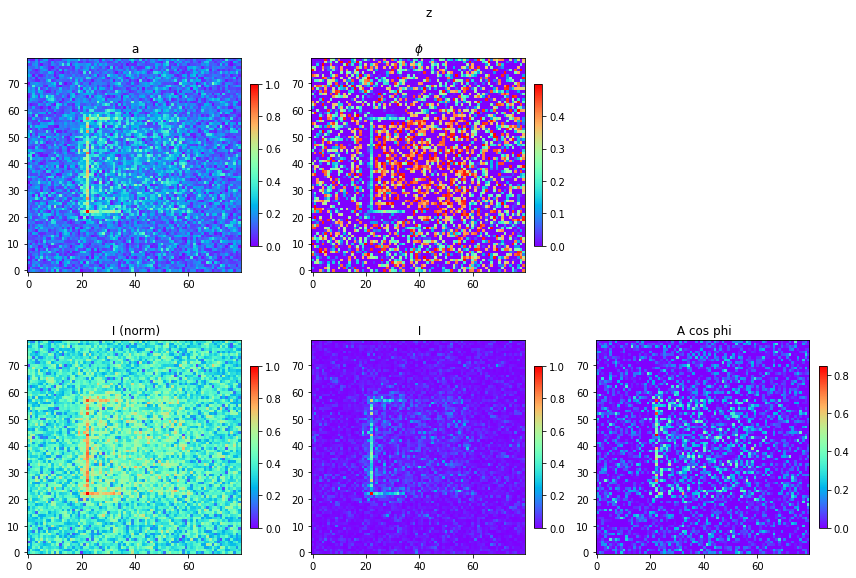

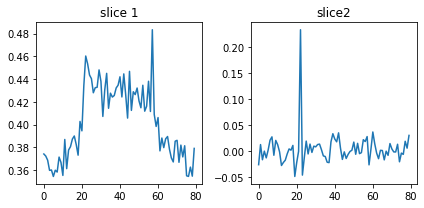

In [15]:
reload(plot)
x_width = 1e2
y_width = 1e2 * LAMBDA
d1 = -1e2
d2 = 0
w = sample_grid(N, x_width * LAMBDA)
v = sample_grid(N, y_width, d1 * LAMBDA, random=1)
u = sample_grid(N, 2*x_width, d2 * LAMBDA, random=0)
print('near', near(y_width, d1 * LAMBDA))

x[:] = 0
# x[N//2 + N_sqrt//3: N//2 + 2*N_sqrt//3, 0] = 1
# x[N//4 + N_sqrt//6: N//4 + N_sqrt//3, 0] = 1
# x[3*N//4 + N_sqrt//6: 3*N//4 + N_sqrt//3, 0] = 1
# for i in range(N_sqrt//3):
#     x[N//3 + N_sqrt//2 + i*N_sqrt, 0] = 1
# # x[N//3 + N_sqrt//3: N//3 + 2*N_sqrt//3, 0] = 1
# # x[N//2 + N_sqrt//3, 0] = 1
# # x[N//2 + 2*N_sqrt//3, 0] = 1
a = x[:,0].reshape((N_sqrt, N_sqrt))
a[:] = 1
zero = -0.5
a[5:-5, 5:-5] = zero
a[:,30:] = zero
x[:,0] = a.flatten()


for m in range(N):
#     y[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=1)
    # source object
    c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
    c += f(0.1, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)  
    
normalize_amplitude(y)
for m in range(N):    
    z[m, :] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

plot.matrix(vec_to_im(x[:, 0]), 'x')
# plot.matrix_multiple(y, 'y')
plot.scatter_multiple(y, v, 'y')
# plot.scatter_multiple(z, u, 'z')
plot.matrix_multiple(z, 'z')

### Square object, displaced in one dim

near False


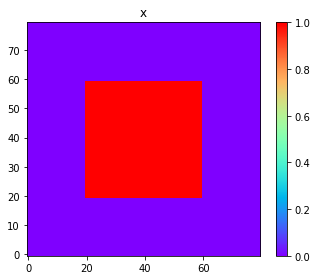

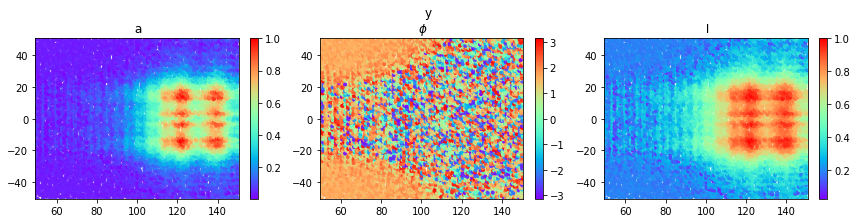

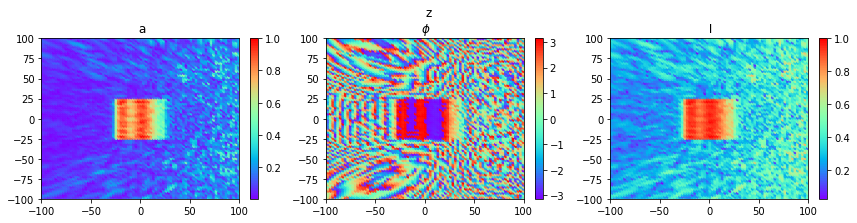

In [139]:
reload(plot)

x_width = 1e2
y_width = 1e2 * LAMBDA
d1 = -1e2
d2 = 0
w = sample_grid(N, x_width * LAMBDA)
v = sample_grid(N, y_width, d1 * LAMBDA, random=1)
u = sample_grid(N, 2*x_width, d2 * LAMBDA, random=0)
print('near', near(y_width, d1 * LAMBDA))

# displace projector perpundicular to z
v[:,0] += y_width

# draw source object
x[:] = 0
a = x[:,0].reshape((N_sqrt, N_sqrt))
a[20:-20, 20:-20] = 1
x[:,0] = a.flatten()

for m in range(N):
#     y[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=1)
    # source object
    c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
    c += f(0.1, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)  
    
normalize_amplitude(y)
for m in range(N):    
    z[m, :] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

plot.matrix(vec_to_im(x[:, 0]), 'x')
plot.scatter_multiple(y, v, 'y')
plot.scatter_multiple(z, u, 'z')

near False


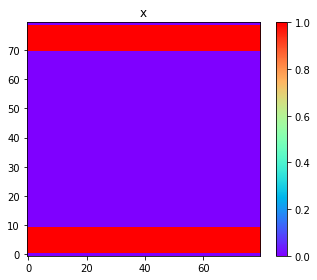

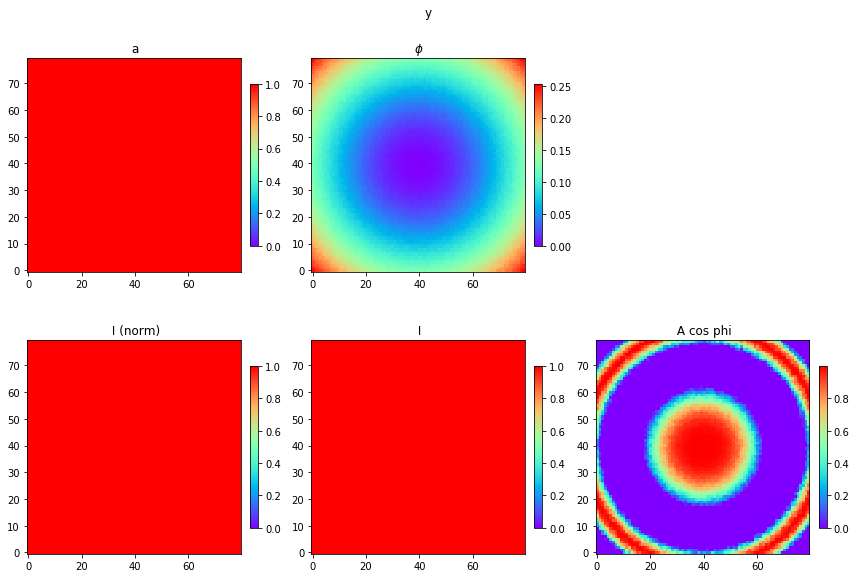

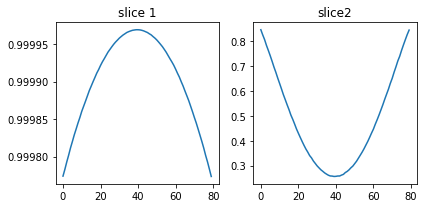

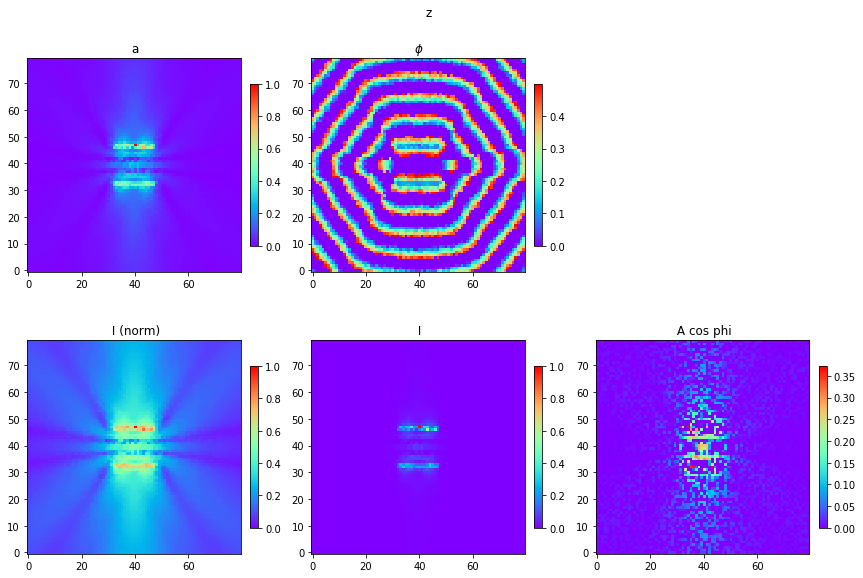

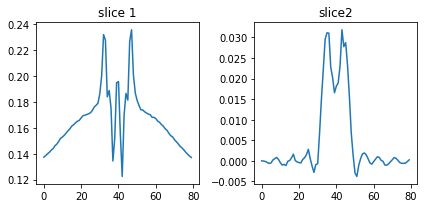

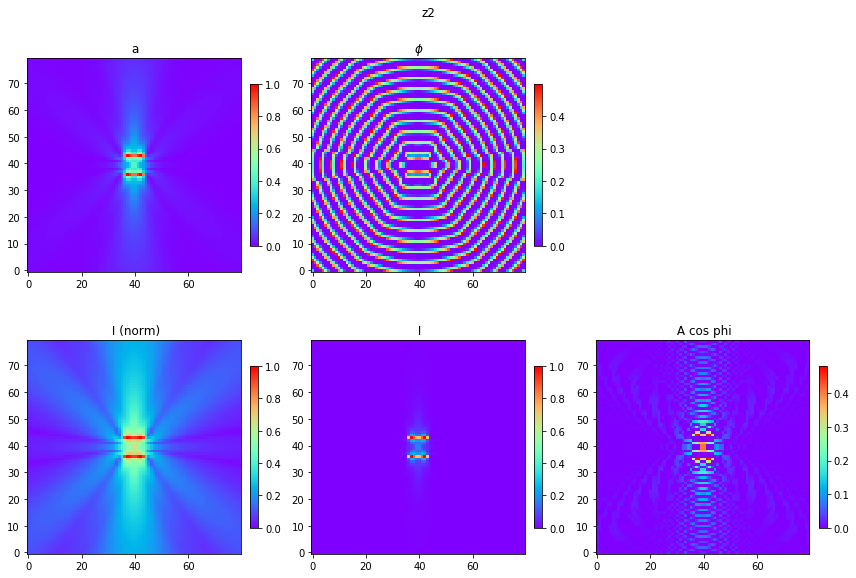

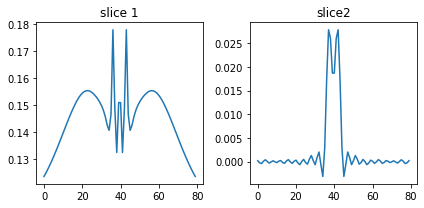

In [5]:
x_width = 1e2
width = 1e2 * LAMBDA
d1 = -1e2 * width
d2 = 0
w = sample_grid(N, 2*LAMBDA)
v = sample_grid(N, width, d1, random=1)
u = sample_grid(N, 1e1*LAMBDA, d2, random=1)
print('near', near(width, d1))

# center pixel
# x[N//2 + N_sqrt//2, 0] = 1
x[:] = 0
N_sqrt = compute_N_sqrt()
a = x[:,0].reshape((N_sqrt, N_sqrt))
# a[20:30, 20:30] = 1
a[1:10] = 1
a[-10:-1,] = 1
x[:,0] = a.flatten()

for m in range(N):
    y[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
    z[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, u[m])), distance=-1)

normalize_amplitude(y)
normalize_amplitude(z)

plot.matrix(vec_to_im(x[:, 0]), 'x')
plot.matrix_multiple(y, 'y')
plot.matrix_multiple(z, 'z')

u2 = sample_grid(N, 20 * LAMBDA, d2)

for m in range(N):
    z[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, u2[m])), distance=-1)

normalize_amplitude(z)

plot.matrix_multiple(z, 'z2')

# Gradient object

near False


(1.0, 0.37657282578782214)

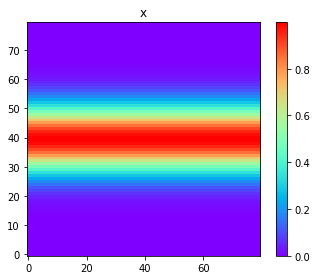

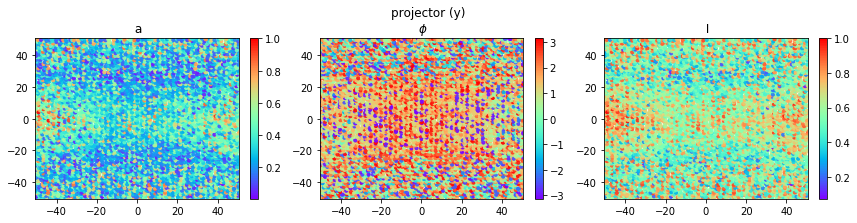

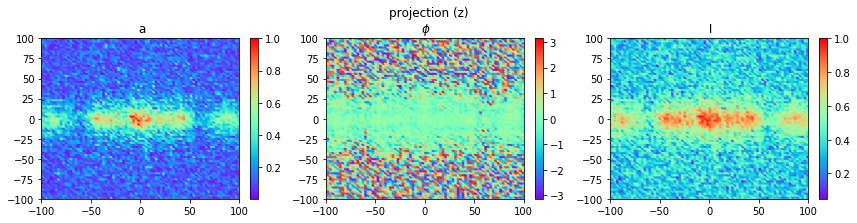

In [152]:
x_width = 2e2
width = 1e2 * LAMBDA
d1 = -1e2
d2 = 0
w = sample_grid(N, x_width * LAMBDA)
v = sample_grid(N, width, d1 * LAMBDA, random=1)
u = sample_grid(N, x_width, d2 * LAMBDA, random=0)
print('near', near(width, d1 * LAMBDA))

x[:] = 0
a = x[:,0].reshape((N_sqrt, N_sqrt))
for i in range(N_sqrt):
    # gaussian-like shape
    a[:,i] = np.exp(-0.5 * np.linspace(-5,5,N_sqrt)**2)
x[:,0] = a.flatten()
# normalize_amplitude(x)

for m in range(N):
    # source object
    c = sum_kernel(x,w,v[m], direction=-1)    
#     c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
    c += f(0.1, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)

normalize_amplitude(y)
map_sum_kernel(y,z,v,u,distance=1)
# for m in range(N):    
#     z[m, :] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

plot.matrix(vec_to_im(x[:, 0]), 'x')
# plot.matrix_multiple(y, 'projector (y)')
plot.scatter_multiple(y, v, 'projector (y)')
# plot.matrix_multiple(z, 'projection (z)')
plot.scatter_multiple(z, u, 'projection (z)')
a = y[:,0]
a.max(), a.mean()

near False


(1.0, 0.37192495859725816)

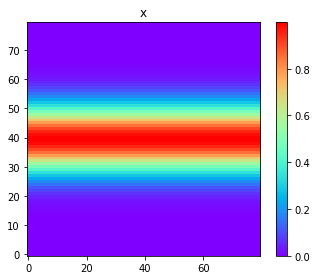

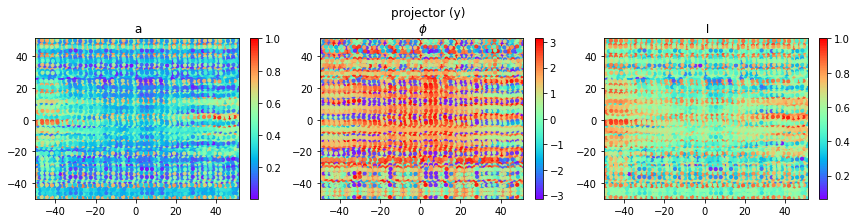

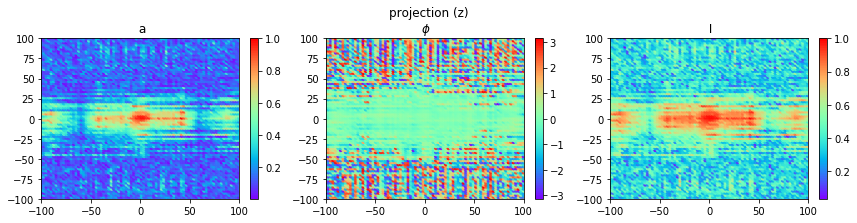

In [149]:
x_width = 2e2
width = 1e2 * LAMBDA
d1 = -1e2
d2 = 0
w = sample_grid(N, x_width * LAMBDA)
v = sample_grid(N, width, d1 * LAMBDA, random='orthogonal')
u = sample_grid(N, x_width, d2 * LAMBDA, random=0)
print('near', near(width, d1 * LAMBDA))

x[:] = 0
a = x[:,0].reshape((N_sqrt, N_sqrt))
for i in range(N_sqrt):
    # gaussian-like shape
    a[:,i] = np.exp(-0.5 * np.linspace(-5,5,N_sqrt)**2)
x[:,0] = a.flatten()
# normalize_amplitude(x)

for m in range(N):
    # source object
    c = sum_kernel(x,w,v[m], direction=-1)    
#     c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
    # plane wave
    c += f(0.1, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)

normalize_amplitude(y)
map_sum_kernel(y,z,v,u,distance=1)
# for m in range(N):    
#     z[m, :] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
normalize_amplitude(z)

plot.matrix(vec_to_im(x[:, 0]), 'x')
# plot.matrix_multiple(y, 'projector (y)')
plot.scatter_multiple(y, v, 'projector (y)')
# plot.matrix_multiple(z, 'projection (z)')
plot.scatter_multiple(z, u, 'projection (z)')
a = y[:,0]
a.max(), a.mean()

(-49.99243870794545, 51.25853838313963)

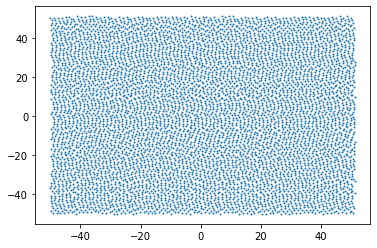

In [142]:
# # w.shape, v.shape
# reload(util)
# from util import *
v = sample_grid(N, width, d1 * LAMBDA, random='orthogonal')
plt.scatter(v[:,0], v[:,1], s=1)
v[:,:-1].min(), v.max()

(-50.6203700375484, 50.62916152630243)

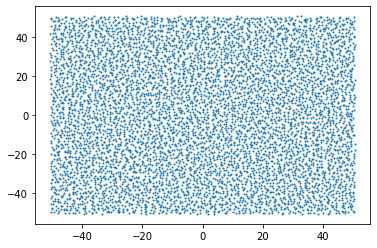

In [143]:
# # w.shape, v.shape
# reload(util)
# from util import *
v = sample_grid(N, width, d1 * LAMBDA, random=1)
plt.scatter(v[:,0], v[:,1], s=1)
v[:,:-1].min(), v.max()

# Frequency spectrum

In [142]:
x_width = 1e2
y_width = 1e2 * LAMBDA
d1 = -1e2
d2 = 0
w = sample_grid(N, x_width * LAMBDA)
v = sample_grid(N, y_width, d1 * LAMBDA, random=1)
u = sample_grid(N, 2*x_width, d2 * LAMBDA, random=0)
print('near field', near(y_width, d1 * LAMBDA))

# draw source object
x[:] = 0
a = x[:,0].reshape((N_sqrt, N_sqrt))
a[20:-20, 20:-20] = 1
x[:,0] = a.flatten()

spfft.fft2(x).shape

# for m in range(N):
# #     y[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=1)
#     # source object
#     c = np.sum(f(x[:,0], x[:,1], w, v[m], direction=-1))
#     # plane wave
#     c += f(0.1, 0, 0, np.ones(3).reshape(1,-1))
#     y[m, :] = from_polar(c, distance=1)  
    
# normalize_amplitude(y)
# for m in range(N):    
#     z[m, :] = from_polar(np.sum(f(y[:,0], y[:,1], v, u[m])), distance=1)
# normalize_amplitude(z)

# plot.matrix(vec_to_im(x[:, 0]), 'x')
# plot.scatter_multiple(y, v, 'y')
# plot.scatter_multiple(z, u, 'z')

near field False


(6400, 2)

In [ ]:
reload(util)
from util import *